## Adaboost from scratch

Adaptive boosting was the first really successful boosting algorithm developed for binary classification. 

It is a sequential ensemble tree-base algorithm. It boost the overall preformance by adding weak learners sequentially and put more weights on the misclassified samples by the previous learner. 

It is sensitive to noisy data and outliers and in some problems it can be less susceptible to the overfitting problem.

In [1]:
from __future__ import division, print_function
import numpy as np
import math


class DecisionStump():
## use decision stump (decision tree with one level) as weak learner
    def __init__(self):
        self.polarity = 1
        self.feature_index = None
        self.threshold = None
        self.alpha = None

class Adaboost():
## number of classifiers
    def __init__(self, n_clf=20):
        self.n_clf = n_clf

    def fit(self, X, y):
        n_samples, n_features = np.shape(X)
        w = np.full(n_samples, (1 / n_samples))
        # assign a weight to each sample
        self.clfs = []
        y[y==0] = -1
        
        for _ in range(self.n_clf):
            clf = DecisionStump()
            min_error = float('inf')
            for feature_i in range(n_features):
                unique_values = np.unique(X[:, feature_i])
                for threshold in unique_values:
                    p = 1
                    prediction = np.ones(np.shape(y))
                    prediction[X[:, feature_i] < threshold] = -1
                    error = sum(w[y != prediction])
                    # use sum of weights of misclassified samples as error fuction
                    # aim to minimize the error fuction by adding more weight 
                    
                    if error > 0.5:
                        error = 1 - error
                        p = -1

                    if error < min_error:
                        clf.polarity = p
                        clf.threshold = threshold
                        clf.feature_index = feature_i
                        min_error = error
                    
            clf.alpha = 0.5 * math.log((1.0 - min_error) / (min_error + 1e-10))
            predictions = np.ones(np.shape(y))
            negative_idx = (clf.polarity * X[:, clf.feature_index] < clf.polarity * clf.threshold)
            predictions[negative_idx] = -1
            w *= np.exp(-clf.alpha * y * predictions)
            # adjust the weights
            w /= np.sum(w)
            self.clfs.append(clf)

    def predict(self, X):
        n_samples = np.shape(X)[0]
        y_pred = np.zeros((n_samples, 1))

        for clf in self.clfs:
            predictions = np.ones(np.shape(y_pred))
            negative_idx = (X[:, clf.feature_index] < clf.threshold)
            predictions[negative_idx] = -1
            y_pred += clf.alpha * predictions
        y_pred = (np.sign(y_pred).flatten() + 1)/2

        return y_pred

In [2]:
X = np.array([[1, 2, 3, 4, 5, 6], [2, 3, 4, 5, 6, 7]]).T
y = np.array([0, 0, 0, 1, 1, 1])
X_t=np.array([[2,1],[7,8]])

AB = Adaboost()
AB.fit(X, y)
AB.predict(X_t)

array([ 0.,  1.])

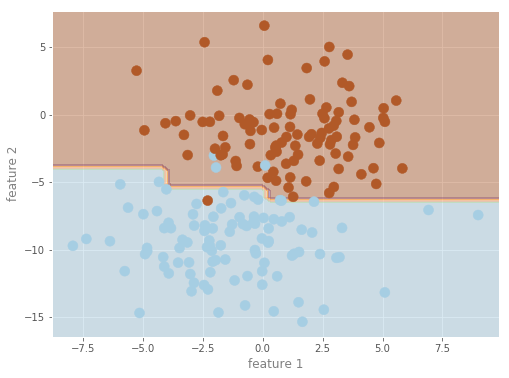

In [3]:
## Model and visulization
from tools.plot import plot_class

AB=Adaboost()
plot_class(AB)